# Analyse the Area Under Curve values

We have already conducted our main analysis on $\log(k)$ parameters for the Hyperbolic discount function. However, we want to check that our core research conclusions are not overly affected by our choice of the Hyperbolic function. So here we will conduct similar 3x2 analyses but based upon other discount functions.

These different discount functions have different parameters and also different numbers of parameters. Therefore in order to compare them against each other, we use the Area Under Curve (AUC) measure as the main outcome variable.

But to do this we will use the `dabest` package again. We want to look at the differences in AUC between the fasting and control conditions, for each commodity. The`dabest` package uses bootstrap resampling so that we can get confidence intervals on these changes.

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import dabest

In [2]:
discount_functions = ['Exponential', 'Hyperbolic', 'ModifiedRachlin', 'Hyperboloid']

files = ['parameter_estimation_Exponential.csv', 
         'parameter_estimation_Hyperbolic.csv', 
         'parameter_estimation_ModifiedRachlin.csv',
         'parameter_estimation_Hyperboloid.csv']

We are going to use the `dabest` package in order to create nice looking plots. By default this needs wide-form data, so we will define a function here to convert the long-form data to wide-form.

In [3]:
def long_to_wide(df):
    '''Convert long-form data to wide-form data'''
    # pivot long to wide
    df = df.set_index('id')
    df = df.pivot_table(index='id', columns=['commodity', 'condition'], values='AUC')
    # collapse column multi-index 
    df.columns = [' '.join(col).strip() for col in df.columns.values]
    # set index to a column
    df = df.reset_index()
    return df

Conduct analysis, iterating over the discount functions.


------------Exponential------------
DABEST v0.2.1
             
Good evening!
The current time is Wed May  1 22:36:49 2019.

The paired mean difference between food C and food F is -0.364 [95%CI -0.487, -0.233].
The two-sided p-value of the Wilcoxon test is 9.64e-08.

The paired mean difference between money C and money F is -0.124 [95%CI -0.249, -0.016].
The two-sided p-value of the Wilcoxon test is 0.00017.

The paired mean difference between music C and music F is -0.152 [95%CI -0.273, -0.0386].
The two-sided p-value of the Wilcoxon test is 0.000191.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`
   control     test      effect_size  is_paired  difference  ci   bca_low  \
0   food C   food F  mean difference       True   

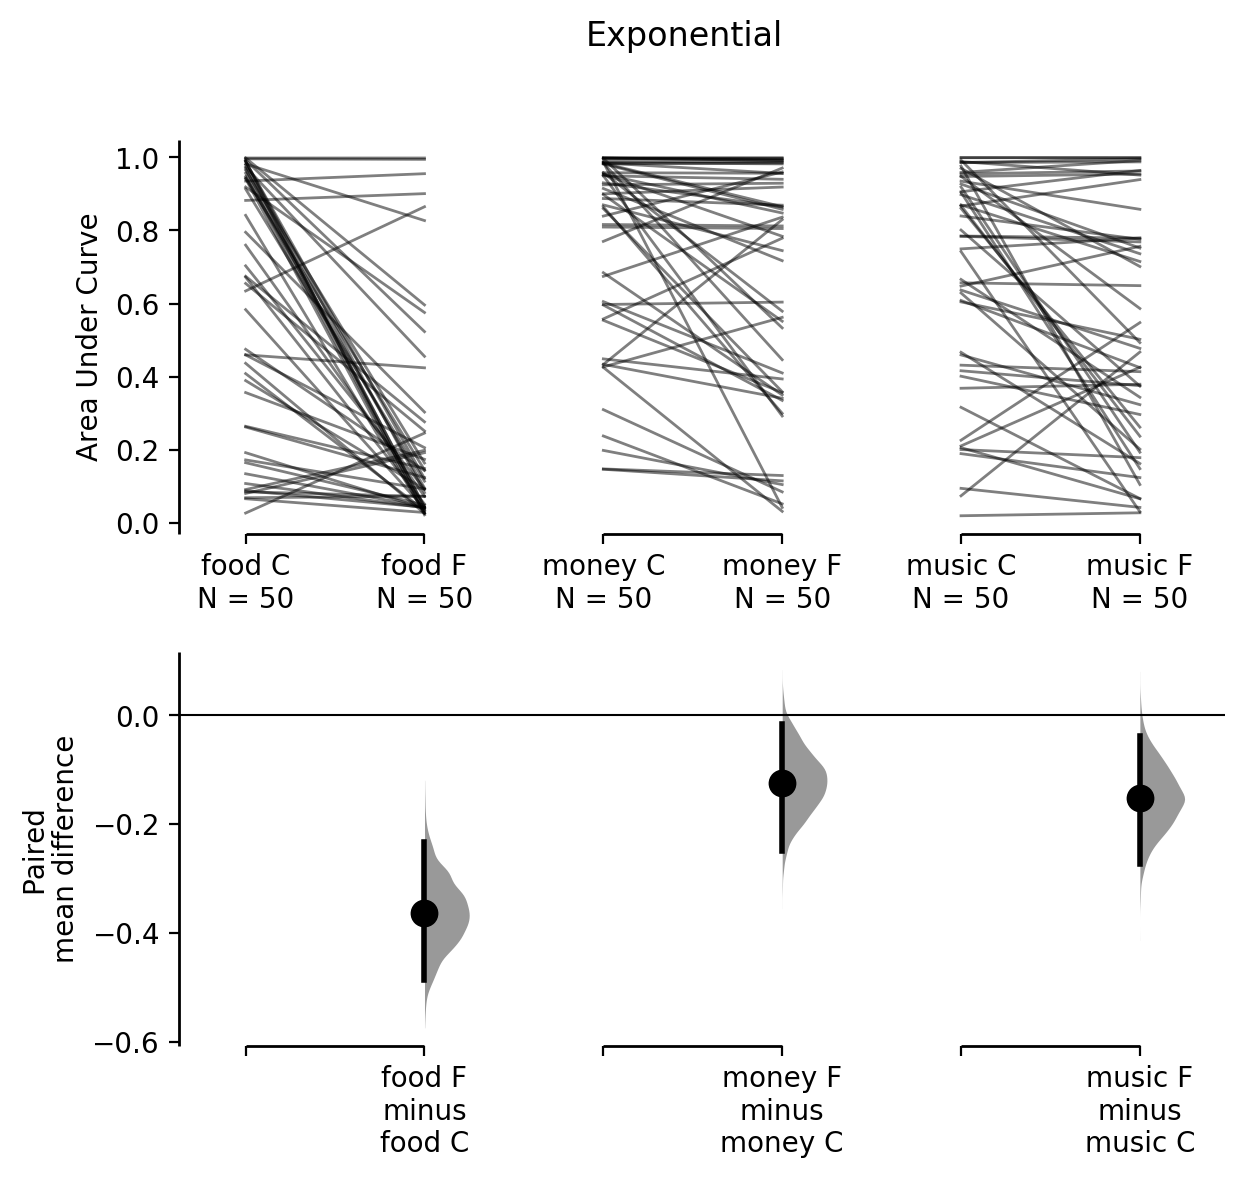

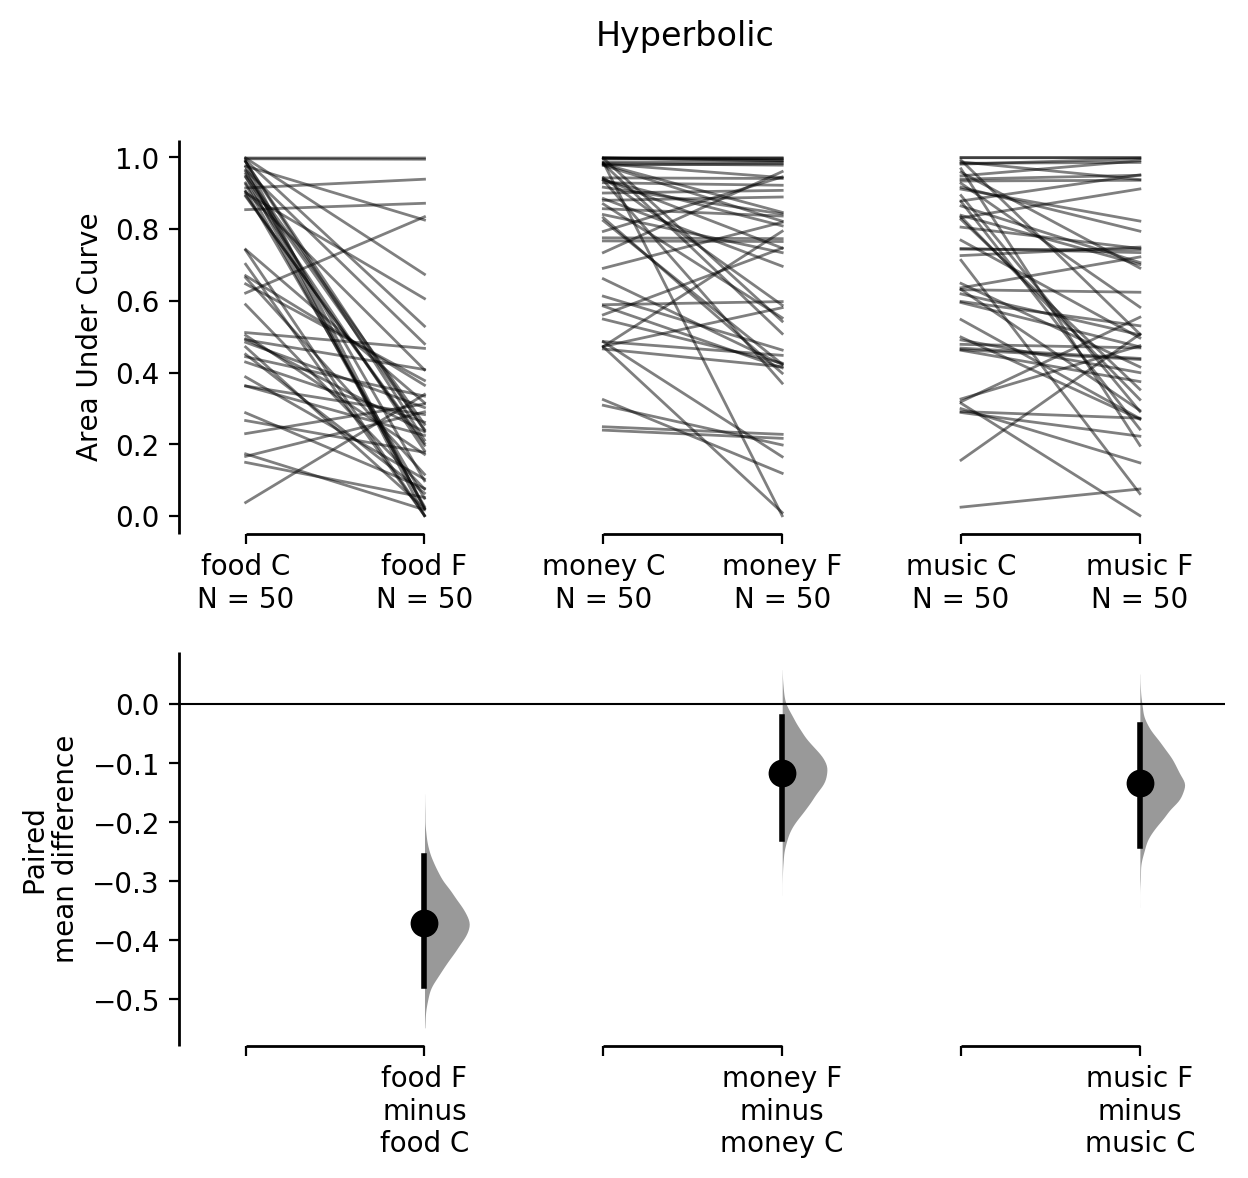

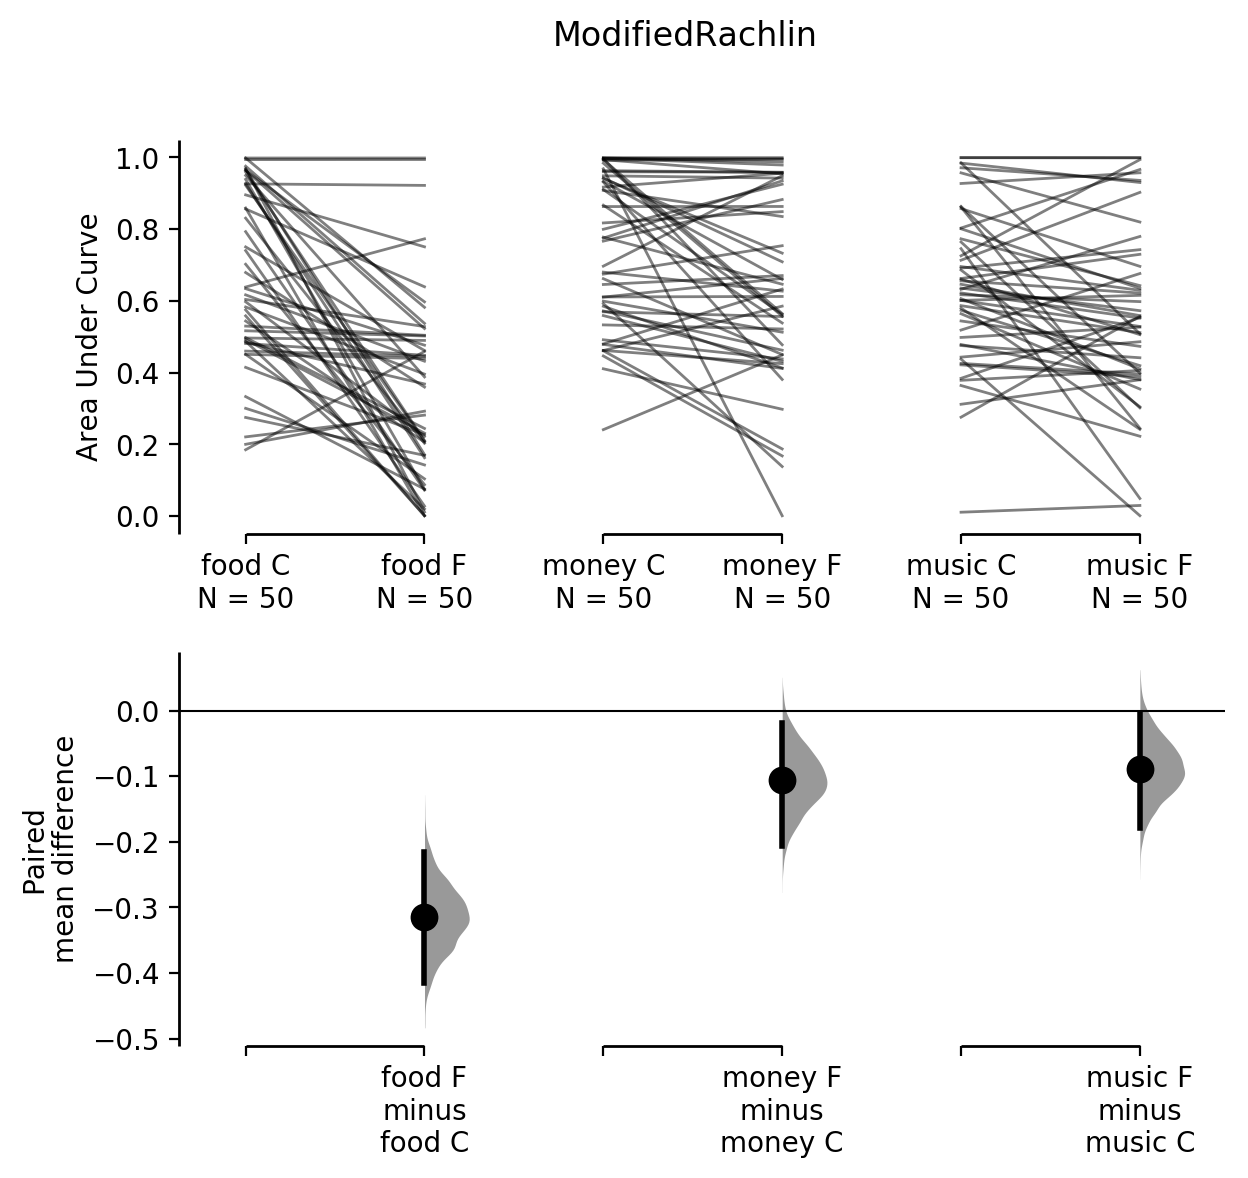

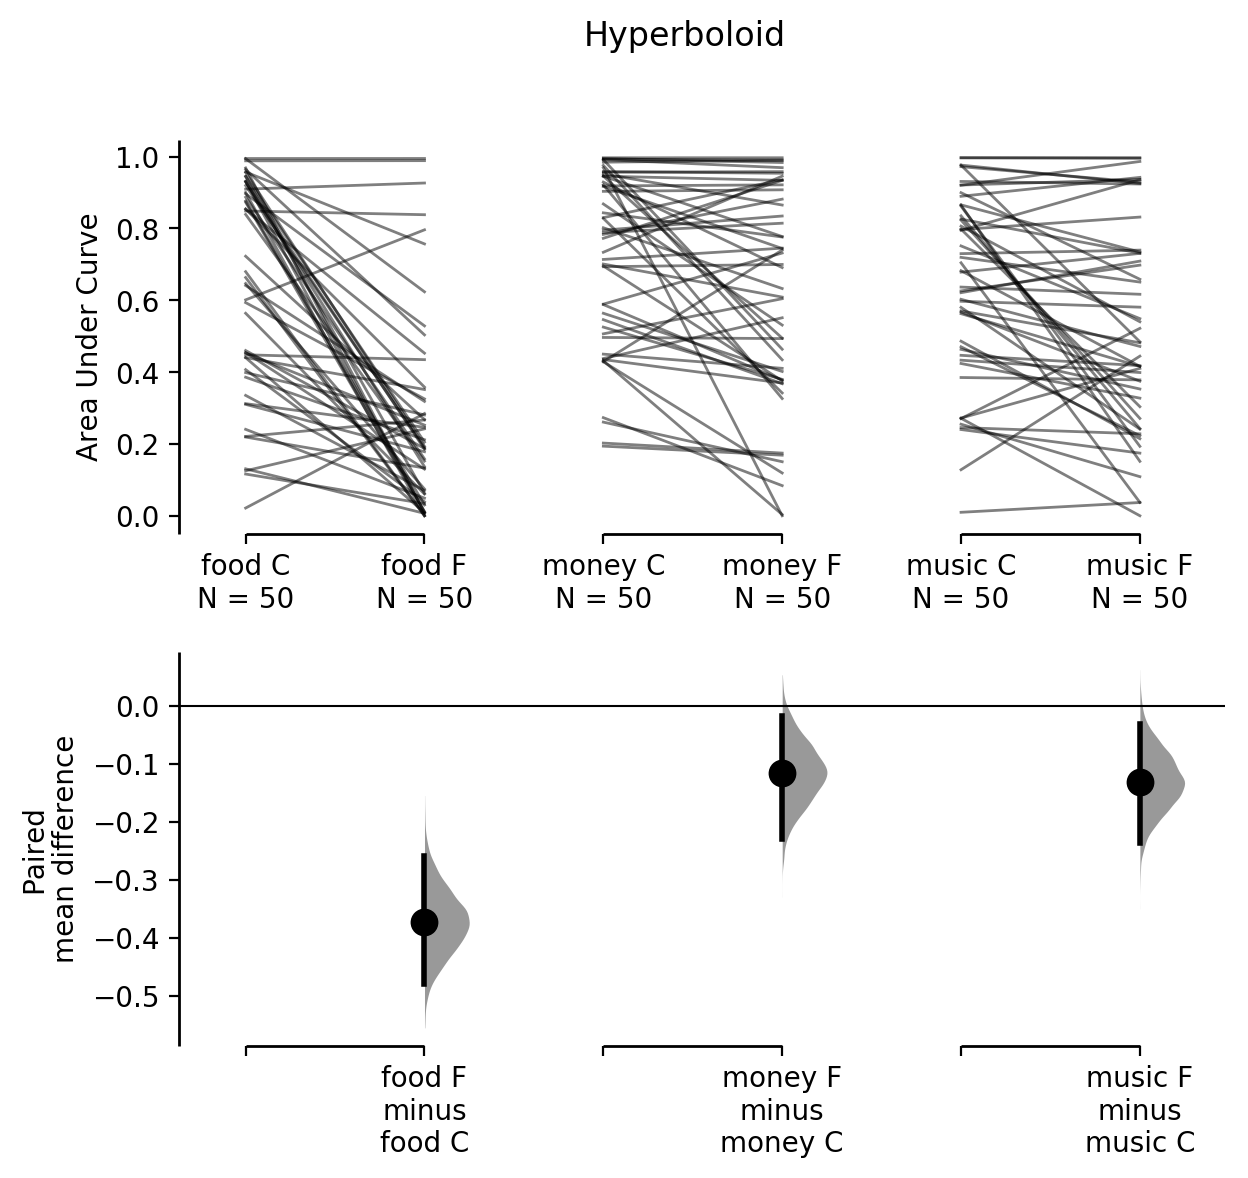

In [4]:
for discount_func, file in zip(discount_functions, files):
    
    print(f'\n------------{discount_func}------------')
    df = pd.read_csv(file)
    df = long_to_wide(df)
    df.to_csv(f'data_wide_{discount_func}_AUC.csv', index=False)
    
    test = dabest.load(df, idx=(("food C", "food F"), 
                                ("money C", "money F"),
                                ("music C", "music F")),
                       paired=True, 
                       id_col="id",
                       random_seed=12345)
    
    print(test.mean_diff)
    
    print(test.mean_diff.statistical_tests)
    
    # plotting
    model_plot = test.mean_diff.plot()
    ax = model_plot.get_axes()
    ax[0].set_ylabel('Area Under Curve')
    
    fig = plt.gcf()
    fig.suptitle(f'{discount_func}', fontsize=12)
    
    plt.savefig(f'../figs/model_{discount_func}.pdf', bbox_inches='tight')

_Note: Because AUC is our dependent variable, a decrease in AUC corresponds to an increase in discounting._

Overall, the fact that we see the same basic pattern of results in the AUC values for all the discounting models, shows that our conclusions based upon $\log(k)$ (for the Hyperbolic model) are robust.

First, if we look at the AUC values for the Hyperbolic model (middle plot) we can see what we expect - that the results for the hyperbolic model (using the AUC metric) are similar to that for the $\log(k)$ measure. 

Similarly, the pattern is very similar for the Hyperboloid model (bottom plot).

For the Exponential model, it must be said that the change in AUC (for money and music commodities) from fasting to control does overlap much more with zero. 